In [ ]:
!git clone https://github.com/UnderGroundVerse/Neural-Astar-using-Transformer.git

Cloning into 'Neural-Astar-using-Transformer'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 45 (delta 13), reused 37 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (45/45), 704.82 KiB | 5.38 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
%cd Neural-Astar-using-Transformer

/content/Neural-Astar-using-Transformer


In [1]:
!kaggle datasets download balraj98/deepglobe-road-extraction-dataset

Dataset URL: https://www.kaggle.com/datasets/balraj98/deepglobe-road-extraction-dataset
License(s): other




  0%|          | 0.00/3.79G [00:00<?, ?B/s]
  0%|          | 1.00M/3.79G [00:00<1:03:31, 1.07MB/s]
  0%|          | 2.00M/3.79G [00:01<38:23, 1.77MB/s]  
  0%|          | 3.00M/3.79G [00:01<27:29, 2.47MB/s]
  0%|          | 4.00M/3.79G [00:01<22:11, 3.06MB/s]
  0%|          | 5.00M/3.79G [00:01<19:18, 3.51MB/s]
  0%|          | 6.00M/3.79G [00:02<17:50, 3.80MB/s]
  0%|          | 7.00M/3.79G [00:02<16:55, 4.00MB/s]
  0%|          | 8.00M/3.79G [00:02<16:30, 4.11MB/s]
  0%|          | 9.00M/3.79G [00:02<16:19, 4.15MB/s]
  0%|          | 10.0M/3.79G [00:03<15:30, 4.37MB/s]
  0%|          | 11.0M/3.79G [00:03<15:03, 4.50MB/s]
  0%|          | 12.0M/3.79G [00:03<18:14, 3.71MB/s]
  0%|          | 13.0M/3.79G [00:03<15:20, 4.41MB/s]
  0%|          | 14.0M/3.79G [00:04<15:28, 4.37MB/s]
  0%|          | 15.0M/3.79G [00:04<15:31, 4.36MB/s]
  0%|          | 16.0M/3.79G [00:04<15:48, 4.28MB/s]
  0%|          | 17.0M/3.79G [00:04<16:20, 4.14MB/s]
  0%|          | 18.0M/3.79G [00:05<19:01, 3.55MB/

In [3]:
!unzip deepglobe-road-extraction-dataset.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


True


In [1]:
import pandas as pd


data = pd.read_csv('metadata.csv')

In [2]:
import cv2 as cv
import random
import numpy as np

import matplotlib.pyplot as plt

In [3]:
x_train_paths = data['sat_image_path']
y_train_paths = data['mask_path']



from PIL import Image

x_train = []
y_train = []

for path in x_train_paths[:2000]:
  img = Image.open(path)
  img = img.resize((256, 256))
  x_train.append(np.asarray(img))
  
for path in y_train_paths[:2000]:
  img = Image.open(path)
  img = img.resize((256, 256))
  img = cv.cvtColor(np.array(img), cv.COLOR_BGR2GRAY)
  img = np.expand_dims(img, axis=-1)

  y_train.append(img)



AttributeError: 'list' object has no attribute 'shape'

In [4]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [5]:
print(x_train.shape)
print(y_train.shape)

(2000, 256, 256, 3)
(2000, 256, 256, 1)


In [6]:
x_train = x_train / 255.0
y_train = y_train / 255.0

In [7]:
import os


test_images = []

folder_path = 'test'

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(folder_path, filename)
        img = Image.open(image_path)
        img = img.resize((256, 256))
        test_images.append(np.asarray(img))

test_images = np.array(test_images)

In [8]:
print(test_images.shape)

(1101, 256, 256, 3)


In [9]:
test_images = test_images  / 255.0

In [15]:
# val_images = test_images[:800]
# test_images = test_images[800:-1]
# print(test_images.shape)
# print(val_images.shape)

(300, 256, 256, 3)
(800, 256, 256, 3)


In [10]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print("GPU is available and memory growth is enabled.")
    except RuntimeError as e:
        print(f"Error enabling memory growth: {e}")
else:
    print("No GPU available, using CPU.")

Num GPUs Available:  1
GPU is available and memory growth is enabled.


In [11]:
import keras as ks

from keras import layers





input_shape = (256, 256, 3)





enc_dec_CNN = ks.models.Sequential([

layers.Input(shape=input_shape),
layers.Conv2D(32, (3, 3), strides=2 ,activation='relu', padding='same'),
layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
layers.MaxPooling2D((2, 2), padding='same'),
layers.Conv2D(64, (3, 3), strides=1 ,activation='relu', padding='same'),
layers.Conv2D(64, (3, 3), strides=1 ,activation='relu', padding='same'),
layers.MaxPooling2D((2, 2), padding='same'),
layers.Conv2D(128, (3, 3), strides=1 ,activation='relu', padding='same'),
layers.Conv2D(128, (3, 3), strides=1 ,activation='relu', padding='same'),
layers.MaxPooling2D((2, 2), padding='same'),
layers.Dropout(0.5),
layers.BatchNormalization(),



layers.Conv2DTranspose(128, (3, 3), strides=2, activation='relu', padding='same'),
layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same'),
layers.MaxPooling2D((2, 2), strides=1, padding='same'),
layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same'),
layers.Conv2D(64, (3, 3), strides=1 ,activation='relu', padding='same'),
layers.MaxPooling2D((2, 2), strides=1, padding='same'),
layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same'),
layers.Conv2D(32, (3, 3), strides=1 ,activation='relu', padding='same'),
layers.MaxPooling2D((2, 2), strides=1, padding='same'),
layers.Conv2DTranspose(3, (3, 3), strides=2, activation='relu', padding='same'),
layers.BatchNormalization(),

layers.Conv2D(1, (3,3) ,strides=1 , padding='same' ,activation='sigmoid'),





])



enc_dec_CNN.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

In [12]:
enc_dec_CNN.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])


In [14]:
end_dec_CNN = enc_dec_CNN.fit(x_train, y_train ,epochs=200, batch_size=8)

Epoch 1/200
250/250 [==============================] - 5s 18ms/step - loss: 0.0510 - accuracy: 0.9550
Epoch 2/200
250/250 [==============================] - 4s 18ms/step - loss: 0.0512 - accuracy: 0.9550
Epoch 3/200
250/250 [==============================] - 4s 18ms/step - loss: 0.0511 - accuracy: 0.9550
Epoch 4/200
 28/250 [==>...........................] - ETA: 3s - loss: 0.0459 - accuracy: 0.9583

KeyboardInterrupt: 

In [15]:
enc_dec_CNN.save('enc_dec_CNN3.keras')
enc_dec_CNN.save('enc_dec_CNN_weights3.h5')

(1, 256, 256, 3)


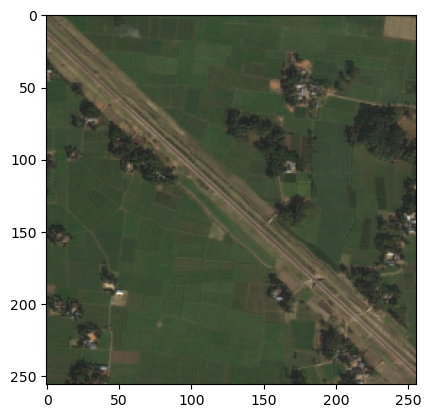

In [55]:

test_image = test_images[100] 
test_image = np.expand_dims(test_image, axis=0)
print(test_image.shape)

plt.imshow(test_image[0])
plt.show()

In [64]:
pred_image = enc_dec_CNN.predict(test_image)
pred_image = pred_image[0]
threshold = 0.1
pred_image = np.where(pred_image > threshold, 1, 0)

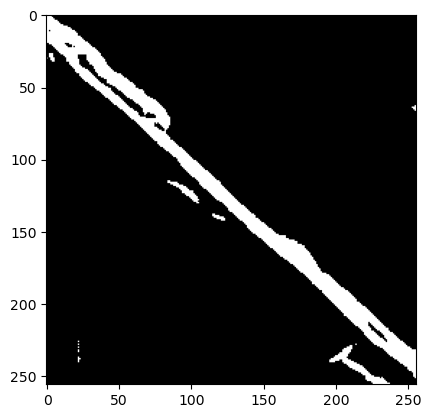

In [65]:
plt.imshow(pred_image , cmap='gray')
plt.show()